textw, texth 134 63
res 8 0
(23, -21)


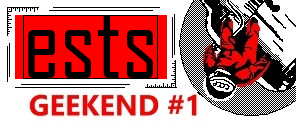

In [29]:
from PIL import Image, ImageDraw, ImageFont

RED = ( 255, 0, 0 )
WHITE = ( 255, 255, 255 )
BLACK = ( 0, 0, 0 )
font_path = "agency_fb.ttf"
image = Image.open("cccp-template.jpg")#.convert(mode="P", colors=3)

# # # # Initialize the drawing context
draw = ImageDraw.Draw(image)

# # # Define the text lines
line1 = "ests"
# Höhe: 11-84px
# Breite: 10-172px
# 431a

# # # Define the fonts and sizes
# font_line2 = ImageFont.truetype(font_path, size=24)  # Change the font file and size as per your preference
x_top = 15
y_top = 15
target_width = 172-x_top -6
target_height = 84-y_top - 6

draw.rectangle((x_top, y_top, target_width + x_top, target_height + y_top),
               fill=RED)

font_size = 5
step_size = 1
text_width = 0
text_height = 0
while text_width < target_width and text_height < target_height:
    font_line1 = ImageFont.truetype(font_path, size=font_size)  # Change the font file and size as per your preference
    text_bbox_line1 = draw.textbbox((0, 0), line1, font=font_line1)
    text_width = (text_bbox_line1[2] - text_bbox_line1[0])
    text_height = text_bbox_line1[3] - text_bbox_line1[1]
    font_size += step_size

font_size-=step_size
font_line1 = ImageFont.truetype(font_path, size=font_size)
text_bbox_line1 = draw.textbbox((0, 0), line1, font=font_line1)
text_width = text_bbox_line1[2] - text_bbox_line1[0]
text_height = text_bbox_line1[3] - text_bbox_line1[1]

print("textw, texth", text_width, text_height)


# text_bbox_line2 = draw.textbbox((0, 0), line2, font=font_line2)

# # Calculate the text positions to center the lines horizontally
# text_position_line1 = (10, 11)
res_x = ((target_width - text_width) // 2)
res_y = ((target_height - text_height) // 2)
print("res", res_x, res_y)
text_position_line1 = ( x_top + res_x - text_bbox_line1[0] , y_top + res_y - text_bbox_line1[1])
print(text_position_line1)
# text_position_line2 = ((image.width - (text_bbox_line2[2] - text_bbox_line2[0])) // 2, 100)

# # Write the text on the image
draw.text(text_position_line1, line1, fill=BLACK, font=font_line1)  # Use palette index 1 for black color
draw.rectangle((x_top + res_x , y_top + res_y,
                 text_bbox_line1[2] + x_top+res_x, text_bbox_line1[3] - text_bbox_line1[1] + y_top + res_y),
               outline=BLACK)
# draw.text(text_position_line2, line2, fill=RED, font=font_line2)  # Use palette index 2 for red color

# # Convert the image to 24-bit RGB
rgb_image = image.convert('RGB')

# # Save the image as JPEG with maximum quality

# rgb_image.save(path, "JPEG", quality="maximum")

# generate_image("Felix2", "he/him", "output.jpg")
rgb_image

In [7]:
text_bbox_line1

(0, 31, 148, 85)

In [30]:
import numpy as np
from PIL import Image, ImageDraw, ImageFont

RED = ( 255, 0, 0 )
WHITE = ( 255, 255, 255 )
BLACK = ( 0, 0, 0 )
font_path = "agency_fb.ttf"
image = Image.open("cccp-template.jpg")#.convert(mode="P", colors=3)

# # # # Initialize the drawing context
draw = ImageDraw.Draw(image)

# # # Define the text lines
line1 = "ests"
# Höhe: 11-84px
# Breite: 10-172px
# 431a

# # # Define the fonts and sizes
# font_line2 = ImageFont.truetype(font_path, size=24)  # Change the font file and size as per your preference

margin = np.array([6,6])
top_left = np.array([15, 15])
target_size = np.array([172,84]) - top_left - margin
bottom_right = top_left + target_size

draw.rectangle((*top_left, *bottom_right),fill=RED)

font_size = 5
step_size = 1
text_size = np.array([0,0])
while np.all(text_size < target_size):
    font_line1 = ImageFont.truetype(font_path, size=font_size)  # Change the font file and size as per your preference
    text_bbox_line1 = np.array(draw.textbbox((0, 0), line1, font=font_line1))
    text_size = text_bbox_line1[2:] - text_bbox_line1[:2]
    font_size += step_size

font_size-=step_size
font_line1 = ImageFont.truetype(font_path, size=font_size)
text_bbox_line1 = np.array(draw.textbbox((0, 0), line1, font=font_line1))
text_size = text_bbox_line1[2:] - text_bbox_line1[:2]

print("textw, texth", text_size)

residual = (target_width - text_width) // 2
print("res", residual)
text_position_line1 = top_left + residual - text_bbox_line1[:2]
print(text_position_line1)

# # Write the text on the image
draw.text(text_position_line1, line1, fill=BLACK, font=font_line1)  # Use palette index 1 for black color
draw.rectangle((x_top + res_x , y_top + res_y,
                 text_bbox_line1[2] + x_top+res_x, text_bbox_line1[3] - text_bbox_line1[1] + y_top + res_y),
               outline=BLACK)
# draw.text(text_position_line2, line2, fill=RED, font=font_line2)  # Use palette index 2 for red color

# # Convert the image to 24-bit RGB
rgb_image = image.convert('RGB')

# # Save the image as JPEG with maximum quality

# rgb_image.save(path, "JPEG", quality="maximum")

# generate_image("Felix2", "he/him", "output.jpg")
rgb_image

ModuleNotFoundError: No module named 'numpy'